In [9]:
import numpy as np
import matplotlib.pyplot as plt
from enkf import EnKF

# EnKF Testing
## Alex Craig

### 1. Rotational Matrix

In [10]:
# Define random seed
seed = 0
np.random.seed(seed)

# Rotation matrix that will be our forward model
theta = 0.3
A = np.array([ [np.cos(theta), -np.sin(theta)], 
               [np.sin(theta), np.cos(theta)] ])

# Initial state
u0 = np.array([5, 0]) 

# Number of time steps for iteration
k = 100

# Memory for u (state)
u = np.zeros((2,k))
# Memory for v (observation)
v = np.zeros((2,k))

# Set initial state
u[:,0] = u0
# Set initial observation
v[:,0] = u0

# State noise level
sigma_state = 0.05 
# Observation noise level
sigma_obs = 0.1 
# Covariance matrix for state noise
cov_obs = np.eye(2)*sigma_obs**2 

# Observation map
H = np.eye(2)

# For each time step
for i in range (k - 1):
    # Update state
    u[:,i+1] = A @ u[:,i] + sigma_state * np.random.normal(2)
    
    # Update observation
    v[:,i+1] = H @ u[:,i+1] + sigma_obs * np.random.normal(2)

In [11]:
# Set up inputs for EnKF
F = lambda x: A @ x
Qsqrt = np.eye(2) * sigma_state**2
Rsqrt = np.eye(2) * sigma_obs**2
n_members = 2

# Call EnKF
EnKF = EnKF(F, H, Qsqrt, Rsqrt, seed, n_members)

In [12]:
# Memory for predicted state
u_pred = np.zeros((2,k))

# For each time step
for i in range (k):
    # Get the current observation
    obs = v[:,i]
    
    # Advance the EnKF
    EnKF.advance_ensemble(obs)
     
    # Get the predicted state
    u_pred[:,i] = EnKF.mean

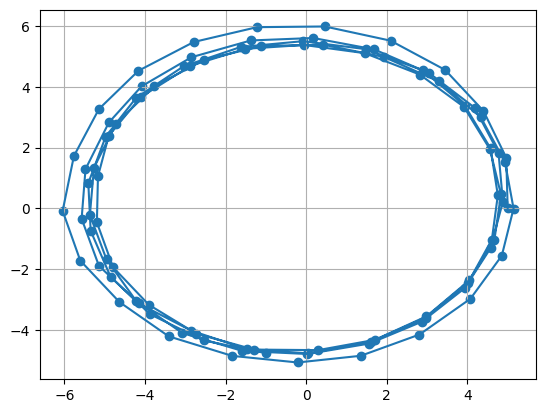

In [13]:
# Plotting the true state
plt.plot(u[0,:], u[1,:])
plt.scatter(u[0,:], u[1,:])
plt.grid()
plt.show()

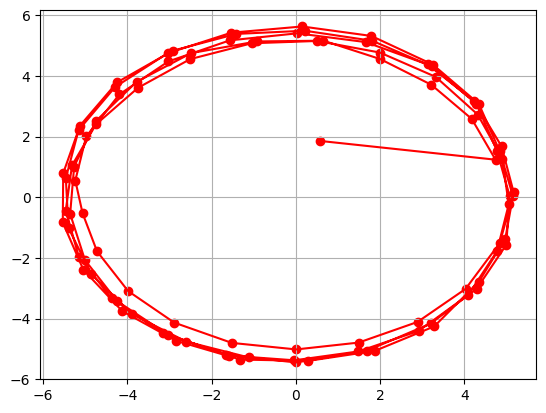

In [14]:
# Plotting the predicted state
plt.plot(u_pred[0,:], u_pred[1,:], 'r')
plt.scatter(u_pred[0,:], u_pred[1,:], c='r')
plt.grid()
plt.show()

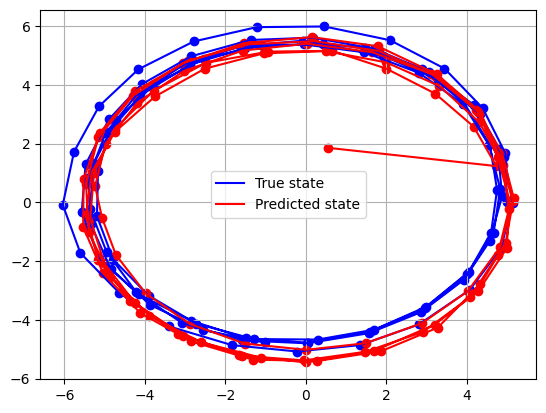

In [15]:
# Plotting true state in blue
plt.plot(u[0,:], u[1,:], 'b-', label='True state')  # Blue line for true state
plt.scatter(u[0,:], u[1,:], c='b')  # Blue points for true state

# Plotting predicted state in red
plt.plot(u_pred[0,:], u_pred[1,:], 'r-', label='Predicted state')  # Red line for predicted state
plt.scatter(u_pred[0,:], u_pred[1,:], c='r')  # Red points for predicted state

plt.legend()
plt.grid()
plt.show()

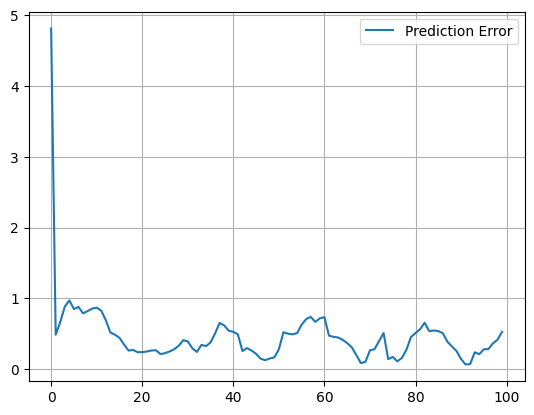

In [16]:
# Plotting the difference between the true and predicted state
plt.plot(np.linalg.norm(u_pred - u, axis=0))
plt.legend(['Prediction Error'])
plt.grid()
plt.show()